# H·ªá th·ªëng hu·∫•n luy·ªán m√¥ h√¨nh nh·∫≠n d·∫°ng d·∫•u thanh

H·ªá th·ªëng s·ª≠ d·ª•ng MediaPipe ƒë·ªÉ nh·∫≠n d·∫°ng 5 d·∫•u thanh: huy·ªÅn, s·∫Øc, h·ªèi, ng√£, n·∫∑ng th√¥ng qua c√°c h√†nh ƒë·ªông tay.

## C√°c b∆∞·ªõc th·ª±c hi·ªán:
1. Import th∆∞ vi·ªán v√† kh·ªüi t·∫°o
2. Ki·ªÉm tra d·ªØ li·ªáu
3. Chu·∫©n b·ªã d·ªØ li·ªáu
4. X√¢y d·ª±ng m√¥ h√¨nh LSTM
5. X√¢y d·ª±ng m√¥ h√¨nh CNN
6. Hu·∫•n luy·ªán m√¥ h√¨nh
7. ƒê√°nh gi√° k·∫øt qu·∫£

## 1. Import th∆∞ vi·ªán v√† kh·ªüi t·∫°o

In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from utils.data_utils import DataProcessor

# Thi·∫øt l·∫≠p matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.19.0
NumPy version: 1.26.3


## 2. Kh·ªüi t·∫°o DataProcessor v√† ki·ªÉm tra d·ªØ li·ªáu

In [16]:
# Kh·ªüi t·∫°o DataProcessor
data_processor = DataProcessor()
classes = data_processor.classes
class_names = data_processor.class_names

print("=== TH√îNG TIN D·ªÆ LI·ªÜU ===")
print(f"S·ªë l·ªõp: {len(classes)}")
print("C√°c l·ªõp:", [class_names[cls] for cls in classes])

# Ki·ªÉm tra th·ªëng k√™ d·ªØ li·ªáu
stats = data_processor.get_data_statistics()
print(f"\nTh·ªëng k√™ d·ªØ li·ªáu:")
for cls in classes:
    print(f"  {class_names[cls]}: {stats[cls]} m·∫´u")
print(f"T·ªïng c·ªông: {stats['total']} m·∫´u")

if stats['total'] < 50:
    print("\n‚ö†Ô∏è  C·∫¢NH B√ÅO: D·ªØ li·ªáu qu√° √≠t! C·∫ßn thu th·∫≠p th√™m d·ªØ li·ªáu.")
else:
    print("\n‚úÖ D·ªØ li·ªáu ƒë·ªß ƒë·ªÉ hu·∫•n luy·ªán!")

=== TH√îNG TIN D·ªÆ LI·ªÜU ===
S·ªë l·ªõp: 5
C√°c l·ªõp: ['huyen', 'sac', 'hoi', 'nga', 'nang']

Th·ªëng k√™ d·ªØ li·ªáu:
  huyen: 40 m·∫´u
  sac: 40 m·∫´u
  hoi: 40 m·∫´u
  nga: 40 m·∫´u
  nang: 40 m·∫´u
T·ªïng c·ªông: 200 m·∫´u

‚úÖ D·ªØ li·ªáu ƒë·ªß ƒë·ªÉ hu·∫•n luy·ªán!


## 3. Chu·∫©n b·ªã d·ªØ li·ªáu cho hu·∫•n luy·ªán

In [17]:
print("ƒêang chu·∫©n b·ªã d·ªØ li·ªáu...")

# T·∫£i d·ªØ li·ªáu
X_train, X_test, y_train, y_test, label_encoder = data_processor.prepare_training_data(
    test_size=0.2
)

# Chia validation t·ª´ training
val_size = int(0.2 * len(X_train))
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train = X_train[:-val_size]
y_train = y_train[:-val_size]

# C·∫≠p nh·∫≠t input shape
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(classes)

print(f"\nShape d·ªØ li·ªáu:")
print(f"  Training: {X_train.shape}")
print(f"  Validation: {X_val.shape}")
print(f"  Test: {X_test.shape}")
print(f"  Input shape: {input_shape}")
print(f"  S·ªë l·ªõp: {num_classes}")

# Hi·ªÉn th·ªã ph√¢n b·ªë d·ªØ li·ªáu
print(f"\nPh√¢n b·ªë d·ªØ li·ªáu training:")
unique, counts = np.unique(y_train, return_counts=True)
for i, (cls_idx, count) in enumerate(zip(unique, counts)):
    cls_name = label_encoder.inverse_transform([cls_idx])[0]
    print(f"  {class_names[cls_name]}: {count} m·∫´u")

ƒêang chu·∫©n b·ªã d·ªØ li·ªáu...

Shape d·ªØ li·ªáu:
  Training: (128, 30, 63)
  Validation: (32, 30, 63)
  Test: (40, 30, 63)
  Input shape: (30, 63)
  S·ªë l·ªõp: 5

Ph√¢n b·ªë d·ªØ li·ªáu training:
  hoi: 29 m·∫´u
  huyen: 28 m·∫´u
  nang: 24 m·∫´u
  nga: 23 m·∫´u
  sac: 24 m·∫´u


## 4. X√¢y d·ª±ng m√¥ h√¨nh LSTM

In [18]:
def build_lstm_model(input_shape, num_classes):
    """X√¢y d·ª±ng m√¥ h√¨nh LSTM"""
    model = models.Sequential([
        # LSTM layers
        layers.LSTM(128, return_sequences=True, input_shape=input_shape),
        layers.Dropout(0.3),
        layers.LSTM(64, return_sequences=False),
        layers.Dropout(0.3),
        
        # Dense layers
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# T·∫°o m√¥ h√¨nh LSTM
lstm_model = build_lstm_model(input_shape, num_classes)
print("=== M√î H√åNH LSTM ===")
lstm_model.summary()

=== M√î H√åNH LSTM ===


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_2 (LSTM)                   ‚îÇ (None, 30, 128)        ‚îÇ        98,304 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_6 (Dropout)             ‚îÇ (None, 30, 128)        ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_3 (LSTM)                   ‚îÇ (None, 64)             ‚îÇ        49,408 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_7 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_8 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_8 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_9 (Dense)                 ‚îÇ (None, 5)              ‚îÇ           165 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 154,117 (602.02 KB)

 Trainable params: 154,117 (602.02 KB)

 Non-trainable params: 0 (0.00 B)

## 5. X√¢y d·ª±ng m√¥ h√¨nh MLP

In [19]:
def build_mlp_model(input_shape, num_classes):
    """X√¢y d·ª±ng m√¥ h√¨nh MLP"""
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# T·∫°o m√¥ h√¨nh MLP
mlp_model = build_mlp_model(input_shape, num_classes)
print("=== M√î H√åNH MLP ===")
mlp_model.summary()

=== M√î H√åNH MLP ===


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 1890)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_10 (Dense)                ‚îÇ (None, 256)            ‚îÇ       484,096 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_9 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_11 (Dense)                ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_10 (Dropout)            ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_12 (Dense)                ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_11 (Dropout)            ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_13 (Dense)                ‚îÇ (None, 5)              ‚îÇ           325 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 525,573 (2.00 MB)

 Trainable params: 525,573 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Hu·∫•n luy·ªán m√¥ h√¨nh LSTM

In [20]:
# Thi·∫øt l·∫≠p callbacks cho LSTM
lstm_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7
    ),
    callbacks.ModelCheckpoint(
        filepath='trained_models/lstm_model_best.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Hu·∫•n luy·ªán m√¥ h√¨nh LSTM
print("=== HU·∫§N LUY·ªÜN M√î H√åNH LSTM ===")
lstm_history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=lstm_callbacks,
    verbose=1
)

=== HU·∫§N LUY·ªÜN M√î H√åNH LSTM ===
Epoch 1/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - accuracy: 0.2070 - loss: 1.6128
Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to trained_models/lstm_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 194ms/step - accuracy: 0.2000 - loss: 1.6154 - val_accuracy: 0.1250 - val_loss: 1.6297 - learning_rate: 0.0010
Epoch 2/100
3/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.2847 - loss: 1.5978
Epoch 2: val_accuracy did not improve from 0.12500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 58ms/step - accuracy: 0.2677 - loss: 1.6014 - val_accuracy: 0.1250 - val_loss: 1.6212 - learning_rate: 0.0010
Epoch 3/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - accuracy: 0.2240 - loss: 1.6102
Epoch 3: val_accuracy did not improve from 0.12500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - accuracy: 0.2260 - loss: 1.6101 - val_accuracy: 0.1250 - val_loss: 1.6147 - learning_rate: 0.0010
Epoch 4/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - accuracy: 0.1309 - loss

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step - accuracy: 0.2656 - loss: 1.5632 - val_accuracy: 0.1875 - val_loss: 1.5565 - learning_rate: 0.0010
Epoch 10/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - accuracy: 0.2734 - loss: 1.5561
Epoch 10: val_accuracy did not improve from 0.18750
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step - accuracy: 0.2750 - loss: 1.5532 - val_accuracy: 0.0938 - val_loss: 1.5569 - learning_rate: 0.0010
Epoch 11/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - accuracy: 0.3561 - loss: 1.4957
Epoch 11: val_accuracy did not improve from 0.18750
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - accuracy: 0.3521 - loss: 1.4936 - val_accuracy: 0.1875 - val_loss: 1.4160 - learning_rate: 0.0010
Epoch 12/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - accuracy: 0.3092 - 

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step - accuracy: 0.3146 - loss: 1.4283 - val_accuracy: 0.4062 - val_loss: 1.2652 - learning_rate: 0.0010
Epoch 13/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step - accuracy: 0.3835 - loss: 1.3490
Epoch 13: val_accuracy did not improve from 0.40625
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 50ms/step - accuracy: 0.3740 - loss: 1.3505 - val_accuracy: 0.4062 - val_loss: 1.2092 - learning_rate: 0.0010
Epoch 14/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - accuracy: 0.4401 - loss: 1.2999
Epoch 14: val_accuracy improved from 0.40625 to 0.53125, saving model to trained_models/lstm_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 66ms/step - accuracy: 0.4458 - loss: 1.2919 - val_accuracy: 0.5312 - val_loss: 1.1141 - learning_rate: 0.0010
Epoch 15/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step - accuracy: 0.4987 - loss: 1.1696
Epoch 15: val_accuracy did not improve from 0.53125
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step - accuracy: 0.4958 - loss: 1.1728 - val_accuracy: 0.5312 - val_loss: 1.0548 - learning_rate: 0.0010
Epoch 16/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - accuracy: 0.5260 - loss: 1.0995
Epoch 16: val_accuracy did not improve from 0.53125
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step - accuracy: 0.5208 - loss: 1.0992 - val_accuracy: 0.5312 - val_loss: 1.0248 - learning_rate: 0.0010
Epoch 17/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step - accuracy: 0.4017 - 

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 65ms/step - accuracy: 0.5385 - loss: 1.2814 - val_accuracy: 0.7812 - val_loss: 0.9603 - learning_rate: 0.0010
Epoch 19/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step - accuracy: 0.4727 - loss: 1.0475
Epoch 19: val_accuracy did not improve from 0.78125
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step - accuracy: 0.4750 - loss: 1.0433 - val_accuracy: 0.5938 - val_loss: 0.9693 - learning_rate: 0.0010
Epoch 20/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - accuracy: 0.5560 - loss: 0.9755
Epoch 20: val_accuracy improved from 0.78125 to 0.87500, saving model to trained_models/lstm_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 65ms/step - accuracy: 0.5635 - loss: 0.9653 - val_accuracy: 0.8750 - val_loss: 0.7795 - learning_rate: 0.0010
Epoch 21/100
3/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.6701 - loss: 0.8653 
Epoch 21: val_accuracy did not improve from 0.87500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - accuracy: 0.6427 - loss: 0.8698 - val_accuracy: 0.7500 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 22/100
3/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - accuracy: 0.5816 - loss: 0.8800
Epoch 22: val_accuracy did not improve from 0.87500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - accuracy: 0.5896 - loss: 0.8772 - val_accuracy: 0.8125 - val_loss: 0.6315 - learning_rate: 0.0010
Epoch 23/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - accuracy: 0.6719 -

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 63ms/step - accuracy: 0.6479 - loss: 0.7636 - val_accuracy: 0.9688 - val_loss: 0.4572 - learning_rate: 0.0010
Epoch 25/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - accuracy: 0.7786 - loss: 0.5738
Epoch 25: val_accuracy did not improve from 0.96875
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step - accuracy: 0.7792 - loss: 0.5733 - val_accuracy: 0.9688 - val_loss: 0.3811 - learning_rate: 0.0010
Epoch 26/100
3/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.8438 - loss: 0.5590
Epoch 26: val_accuracy did not improve from 0.96875
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step - accuracy: 0.8188 - loss: 0.5637 - val_accuracy: 0.9375 - val_loss: 0.3168 - learning_rate: 0.0010
Epoch 27/100
3/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - accuracy: 0.7587 - 

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step - accuracy: 0.8365 - loss: 0.4481 - val_accuracy: 1.0000 - val_loss: 0.1149 - learning_rate: 0.0010
Epoch 39/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - accuracy: 0.8620 - loss: 0.4153
Epoch 39: val_accuracy did not improve from 1.00000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step - accuracy: 0.8677 - loss: 0.4045 - val_accuracy: 0.9375 - val_loss: 0.1893 - learning_rate: 0.0010
Epoch 40/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - accuracy: 0.9362 - loss: 0.2656
Epoch 40: val_accuracy did not improve from 1.00000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step - accuracy: 0.9333 - loss: 0.2666 - val_accuracy: 1.0000 - val_loss: 0.1530 - learning_rate: 0.0010
Epoch 41/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - accuracy: 0.9362 - 

## 7. Hu·∫•n luy·ªán m√¥ h√¨nh MLP

In [21]:
# Thi·∫øt l·∫≠p callbacks cho MLP
mlp_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7
    ),
    callbacks.ModelCheckpoint(
        filepath='trained_models/mlp_model_best.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Hu·∫•n luy·ªán m√¥ h√¨nh MLP
print("=== HU·∫§N LUY·ªÜN M√î H√åNH MLP ===")
mlp_history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=mlp_callbacks,
    verbose=1
)

=== HU·∫§N LUY·ªÜN M√î H√åNH MLP ===
Epoch 1/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 1s/step - accuracy: 0.2188 - loss: 1.9678
Epoch 1: val_accuracy improved from -inf to 0.09375, saving model to trained_models/mlp_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 79ms/step - accuracy: 0.2156 - loss: 1.8201 - val_accuracy: 0.0938 - val_loss: 1.7267 - learning_rate: 0.0010
Epoch 2/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - accuracy: 0.3438 - loss: 1.5339
Epoch 2: val_accuracy improved from 0.09375 to 0.25000, saving model to trained_models/mlp_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step - accuracy: 0.2708 - loss: 1.7283 - val_accuracy: 0.2500 - val_loss: 1.5723 - learning_rate: 0.0010
Epoch 3/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - accuracy: 0.1250 - loss: 1.9384
Epoch 3: val_accuracy did not improve from 0.25000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - accuracy: 0.1917 - loss: 1.8133 - val_accuracy: 0.2500 - val_loss: 1.5750 - learning_rate: 0.0010
Epoch 4/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.2812 - loss: 1.6059
Epoch 4: val_accuracy did not improve from 0.25000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - accuracy: 0.2219 - loss: 1.6918 - val_accuracy: 0.2500 - val_loss: 1.5888 - learning_rate: 0.0010
Epoch 5/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - accuracy: 0.2500 - loss:

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step - accuracy: 0.2271 - loss: 1.6635 - val_accuracy: 0.5312 - val_loss: 1.5573 - learning_rate: 0.0010
Epoch 6/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step - accuracy: 0.2500 - loss: 1.6525
Epoch 6: val_accuracy did not improve from 0.53125
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - accuracy: 0.2208 - loss: 1.6599 - val_accuracy: 0.2500 - val_loss: 1.5565 - learning_rate: 0.0010
Epoch 7/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step - accuracy: 0.3125 - loss: 1.5646
Epoch 7: val_accuracy did not improve from 0.53125
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - accuracy: 0.2990 - loss: 1.5817 - val_accuracy: 0.1250 - val_loss: 1.5482 - learning_rate: 0.0010
Epoch 8/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - accuracy: 0.2500 - loss:

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step - accuracy: 0.3927 - loss: 1.4781 - val_accuracy: 0.7500 - val_loss: 1.4307 - learning_rate: 0.0010
Epoch 16/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step - accuracy: 0.4062 - loss: 1.5167
Epoch 16: val_accuracy did not improve from 0.75000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step - accuracy: 0.3792 - loss: 1.4917 - val_accuracy: 0.3750 - val_loss: 1.4012 - learning_rate: 0.0010
Epoch 17/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step - accuracy: 0.3438 - loss: 1.4847
Epoch 17: val_accuracy did not improve from 0.75000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step - accuracy: 0.3323 - loss: 1.4826 - val_accuracy: 0.5312 - val_loss: 1.3502 - learning_rate: 0.0010
Epoch 18/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step - accuracy: 0.4375 - 

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step - accuracy: 0.4677 - loss: 1.3240 - val_accuracy: 0.8750 - val_loss: 1.1308 - learning_rate: 0.0010
Epoch 23/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - accuracy: 0.5000 - loss: 1.3318
Epoch 23: val_accuracy improved from 0.87500 to 0.90625, saving model to trained_models/mlp_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step - accuracy: 0.4812 - loss: 1.2985 - val_accuracy: 0.9062 - val_loss: 1.1504 - learning_rate: 0.0010
Epoch 24/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - accuracy: 0.5312 - loss: 1.2023
Epoch 24: val_accuracy did not improve from 0.90625
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.5406 - loss: 1.2241 - val_accuracy: 0.7500 - val_loss: 1.0385 - learning_rate: 0.0010
Epoch 25/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step - accuracy: 0.4375 - loss: 1.2452
Epoch 25: val_accuracy did not improve from 0.90625
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - accuracy: 0.4979 - loss: 1.1806 - val_accuracy: 0.7188 - val_loss: 0.9584 - learning_rate: 0.0010
Epoch 26/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step - accuracy: 0.6250 - 

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step - accuracy: 0.6729 - loss: 1.0251 - val_accuracy: 0.9375 - val_loss: 0.7212 - learning_rate: 0.0010
Epoch 28/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - accuracy: 0.5312 - loss: 1.0762
Epoch 28: val_accuracy improved from 0.93750 to 0.96875, saving model to trained_models/mlp_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step - accuracy: 0.6333 - loss: 0.9826 - val_accuracy: 0.9688 - val_loss: 0.6200 - learning_rate: 0.0010
Epoch 29/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - accuracy: 0.8750 - loss: 0.7875
Epoch 29: val_accuracy improved from 0.96875 to 1.00000, saving model to trained_models/mlp_model_best.h5


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step - accuracy: 0.7771 - loss: 0.8117 - val_accuracy: 1.0000 - val_loss: 0.5651 - learning_rate: 0.0010
Epoch 30/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step - accuracy: 0.7500 - loss: 0.8394
Epoch 30: val_accuracy did not improve from 1.00000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - accuracy: 0.7729 - loss: 0.7961 - val_accuracy: 1.0000 - val_loss: 0.4981 - learning_rate: 0.0010
Epoch 31/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step - accuracy: 0.6875 - loss: 0.7349
Epoch 31: val_accuracy did not improve from 1.00000
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - accuracy: 0.7406 - loss: 0.6958 - val_accuracy: 0.9688 - val_loss: 0.4176 - learning_rate: 0.0010
Epoch 32/100
1/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step - accuracy: 0.8125 - 

## 8. ƒê√°nh gi√° m√¥ h√¨nh LSTM

=== ƒê√ÅNH GI√Å M√î H√åNH LSTM ===
Test Accuracy: 0.9750
Test Loss: 0.1213
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 298ms/step

Classification Report:
              precision    recall  f1-score   support

       huyen       0.89      1.00      0.94         8
         sac       1.00      1.00      1.00         8
         hoi       1.00      1.00      1.00         8
         nga       1.00      0.88      0.93         8
        nang       1.00      1.00      1.00         8

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



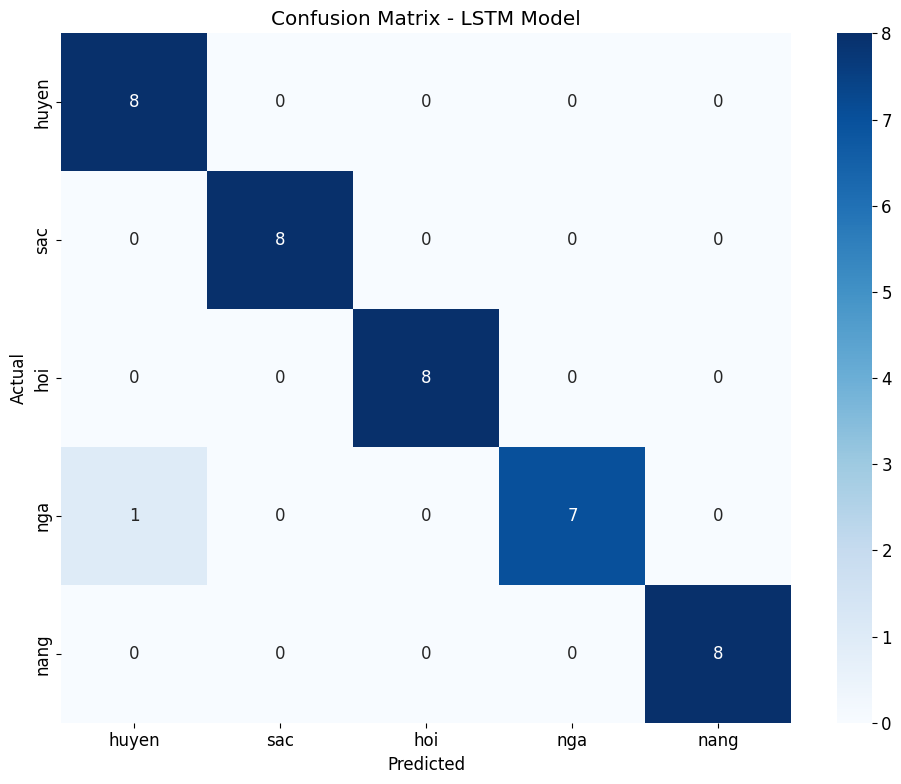

In [22]:
# ƒê√°nh gi√° m√¥ h√¨nh LSTM
print("=== ƒê√ÅNH GI√Å M√î H√åNH LSTM ===")
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {lstm_test_accuracy:.4f}")
print(f"Test Loss: {lstm_test_loss:.4f}")

# D·ª± ƒëo√°n
lstm_y_pred = lstm_model.predict(X_test)
lstm_y_pred_classes = np.argmax(lstm_y_pred, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, lstm_y_pred_classes, 
                          target_names=[class_names[cls] for cls in classes]))

# Confusion matrix
lstm_cm = confusion_matrix(y_test, lstm_y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=[class_names[cls] for cls in classes],
           yticklabels=[class_names[cls] for cls in classes])
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## 9. ƒê√°nh gi√° m√¥ h√¨nh MLP

=== ƒê√ÅNH GI√Å M√î H√åNH MLP ===
Test Accuracy: 0.9750
Test Loss: 0.0379


1/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 65ms/stepWARNING:tensorflow:6 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002148A7DF250> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 66ms/step

Classification Report:
              precision    recall  f1-score   support

       huyen       0.89      1.00      0.94         8
         sac       1.00      1.00      1.00         8
         hoi       1.00      1.00      1.00         8
         nga       1.00      0.88      0.93         8
        nang       1.00      1.00      1.00         8

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



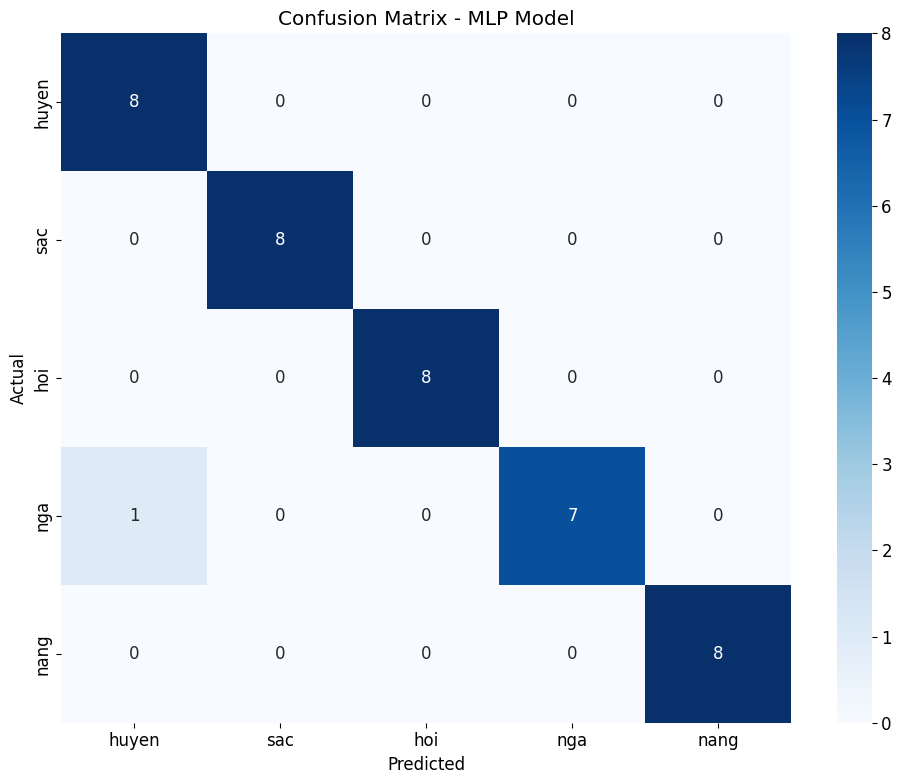

In [23]:
# ƒê√°nh gi√° m√¥ h√¨nh MLP
print("=== ƒê√ÅNH GI√Å M√î H√åNH MLP ===")
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {mlp_test_accuracy:.4f}")
print(f"Test Loss: {mlp_test_loss:.4f}")

# D·ª± ƒëo√°n
mlp_y_pred = mlp_model.predict(X_test)
mlp_y_pred_classes = np.argmax(mlp_y_pred, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, mlp_y_pred_classes, 
                          target_names=[class_names[cls] for cls in classes]))

# Confusion matrix
mlp_cm = confusion_matrix(y_test, mlp_y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=[class_names[cls] for cls in classes],
           yticklabels=[class_names[cls] for cls in classes])
plt.title('Confusion Matrix - MLP Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## 10. So s√°nh hi·ªáu su·∫•t hai m√¥ h√¨nh (LSTM v√† MLP)

=== SO S√ÅNH HI·ªÜU SU·∫§T M√î H√åNH ===
LSTM Accuracy: 0.9750
MLP Accuracy: 0.9750

ü§ù C·∫£ hai m√¥ h√¨nh c√≥ hi·ªáu su·∫•t t∆∞∆°ng ƒë∆∞∆°ng!


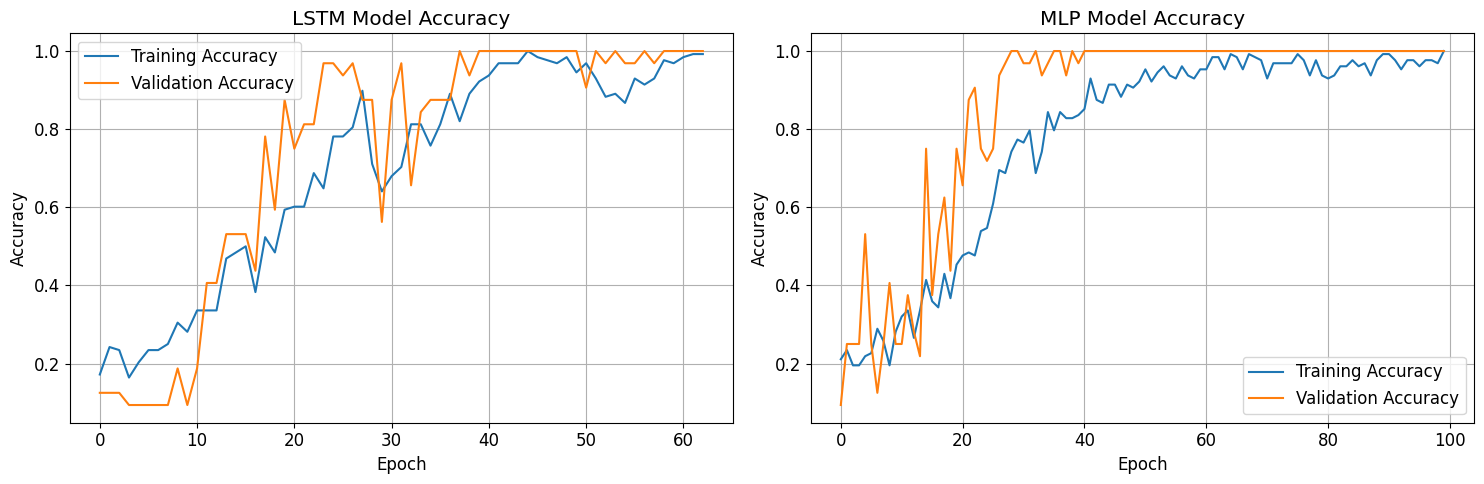

In [24]:
# So s√°nh hi·ªáu su·∫•t
print("=== SO S√ÅNH HI·ªÜU SU·∫§T M√î H√åNH ===")
print(f"LSTM Accuracy: {lstm_test_accuracy:.4f}")
print(f"MLP Accuracy: {mlp_test_accuracy:.4f}")

if lstm_test_accuracy > mlp_test_accuracy:
    print("\nüèÜ LSTM ho·∫°t ƒë·ªông t·ªët h∆°n!")
    best_model = lstm_model
    best_model_name = 'lstm'
elif mlp_test_accuracy > lstm_test_accuracy:
    print("\nüèÜ MLP ho·∫°t ƒë·ªông t·ªët h∆°n!")
    best_model = mlp_model
    best_model_name = 'mlp'
else:
    print("\nü§ù C·∫£ hai m√¥ h√¨nh c√≥ hi·ªáu su·∫•t t∆∞∆°ng ƒë∆∞∆°ng!")
    best_model = lstm_model  # M·∫∑c ƒë·ªãnh ch·ªçn LSTM
    best_model_name = 'lstm'

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# LSTM Training History
ax1.plot(lstm_history.history['accuracy'], label='Training Accuracy')
ax1.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('LSTM Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# MLP Training History
ax2.plot(mlp_history.history['accuracy'], label='Training Accuracy')
ax2.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('MLP Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## 11. L∆∞u m√¥ h√¨nh t·ªët nh·∫•t

In [25]:
# T·∫°o th∆∞ m·ª•c trained_models n·∫øu ch∆∞a c√≥
os.makedirs('trained_models', exist_ok=True)

# L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
best_model_path = f'trained_models/{best_model_name}_model_final.h5'
best_model.save(best_model_path)

# L∆∞u label encoder
encoder_path = f'trained_models/{best_model_name}_model_label_encoder.pkl'
data_processor.save_label_encoder(encoder_path)

print(f"\n‚úÖ M√¥ h√¨nh t·ªët nh·∫•t ƒë√£ ƒë∆∞·ª£c l∆∞u:")
print(f"  - M√¥ h√¨nh: {best_model_path}")
print(f"  - Label encoder: {encoder_path}")
print(f"  - Lo·∫°i m√¥ h√¨nh: {best_model_name.upper()}")
print(f"  - Accuracy: {max(lstm_test_accuracy, mlp_test_accuracy):.4f}")


‚úÖ M√¥ h√¨nh t·ªët nh·∫•t ƒë√£ ƒë∆∞·ª£c l∆∞u:
  - M√¥ h√¨nh: trained_models/lstm_model_final.h5
  - Label encoder: trained_models/lstm_model_label_encoder.pkl
  - Lo·∫°i m√¥ h√¨nh: LSTM
  - Accuracy: 0.9750


## 12. T√≥m t·∫Øt k·∫øt qu·∫£

In [26]:
# T√≥m t·∫Øt k·∫øt qu·∫£
print("=== T√ìM T·∫ÆT K·∫æT QU·∫¢ HU·∫§N LUY·ªÜN ===")
print(f"\nüìä Th·ªëng k√™ d·ªØ li·ªáu:")
for cls in classes:
    print(f"  - {class_names[cls]}: {stats[cls]} m·∫´u")
print(f"  - T·ªïng c·ªông: {stats['total']} m·∫´u")

print(f"\nü§ñ K·∫øt qu·∫£ m√¥ h√¨nh:")
print(f"  - LSTM Accuracy: {lstm_test_accuracy:.4f}")
print(f"  - MLP Accuracy: {mlp_test_accuracy:.4f}")
print(f"  - M√¥ h√¨nh t·ªët nh·∫•t: {best_model_name.upper()}")

print(f"\nüíæ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i:")
print(f"  - {best_model_path}")
print(f"  - {encoder_path}")

print(f"\nüéØ B∆∞·ªõc ti·∫øp theo:")
print(f"  - Ch·∫°y predict.py ƒë·ªÉ test m√¥ h√¨nh")
print(f"  - Ho·∫∑c s·ª≠ d·ª•ng m√¥ h√¨nh trong ·ª©ng d·ª•ng th·ª±c t·∫ø")

=== T√ìM T·∫ÆT K·∫æT QU·∫¢ HU·∫§N LUY·ªÜN ===

üìä Th·ªëng k√™ d·ªØ li·ªáu:
  - huyen: 40 m·∫´u
  - sac: 40 m·∫´u
  - hoi: 40 m·∫´u
  - nga: 40 m·∫´u
  - nang: 40 m·∫´u
  - T·ªïng c·ªông: 200 m·∫´u

ü§ñ K·∫øt qu·∫£ m√¥ h√¨nh:
  - LSTM Accuracy: 0.9750
  - MLP Accuracy: 0.9750
  - M√¥ h√¨nh t·ªët nh·∫•t: LSTM

üíæ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i:
  - trained_models/lstm_model_final.h5
  - trained_models/lstm_model_label_encoder.pkl

üéØ B∆∞·ªõc ti·∫øp theo:
  - Ch·∫°y predict.py ƒë·ªÉ test m√¥ h√¨nh
  - Ho·∫∑c s·ª≠ d·ª•ng m√¥ h√¨nh trong ·ª©ng d·ª•ng th·ª±c t·∫ø
